<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
##### Your Code Here #####
# need to clean first - needs to be numeric and have NO missing values
# age for re-modelling?
# mac: pandas date time took forever to figure out yesterday so heres an example
# df['month_sold'] = pd.to_datetime(df.date).dt.month

In [0]:
# seaborn
!pip3 install seaborn -U

    100% |████████████████████████████████| 215kB 12.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
print(df.shape)
df.sample(8)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,41,Unf,0,823,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,67000
891,892,60,RL,70.0,11184,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,5,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkFace,92.0,TA,TA,CBlock,TA,TA,No,LwQ,226,Rec,500,192,918,GasA,Gd,Y,SBrkr,918,765,0,1683,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2,440,TA,TA,Y,243,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,172500
782,783,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1413,1413,GasA,Ex,Y,SBrkr,1430,0,0,1430,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,RFn,2,605,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,187100
117,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1125,1125,GasA,Gd,Y,SBrkr,1125,0,0,1125,0,0,1,1,2,1,TA,5,Typ,0,NaN,Attchd,2007.0,Unf,2,430,TA,TA,Y,80,64,0,0,0,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
669,670,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,700,700,GasA,Ex,Y,SBrkr,1180,0,0,1180,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,1922.0,Unf,1,252,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137500
169,170,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1686,1686,GasA,TA,Y,SBrkr,1707,0,0,1707,0,0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2,511,TA,TA,Y,574,64,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,228000
1398,1399,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,4,1950,1982,Gable,CompShg,VinylSd,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,180,BLQ,352,676,1208,GasA,Gd,Y,FuseA,1136,768,0,1904,1,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,0,0,168,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,138000
1168,1169,70,RL,120.0,13728,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,1935,1986,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626,Unf,0,501,1127,GasA,Ex,Y,SBrkr,1236,872,0,2108,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,1935.0,Unf,2,540,TA,TA,Y,0,0,0,0,90,0,NaN,NaN,NaN,0,7,2008,WD,Normal,235000


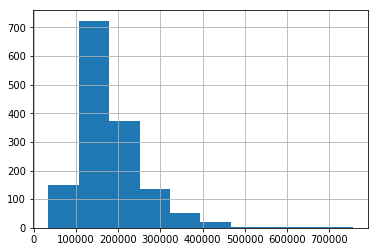

In [0]:
df.SalePrice.hist()

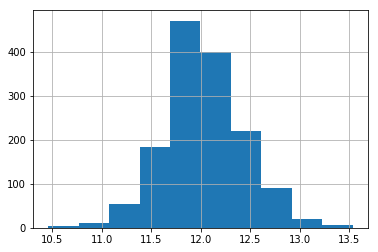

In [0]:
np.log(df['SalePrice']).hist()

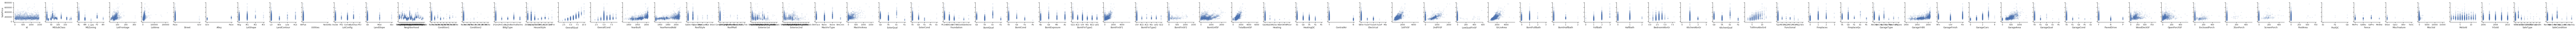

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns, plot_kws={'alpha': 0.1, 'linewidth':0})

In [0]:
# drop non-numeric columns
df_trim = df._get_numeric_data()

In [0]:
df_trim.isnull().sum().sort_values(ascending=False)[:3]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [0]:
# get rid of nas
df_trim.drop(columns=['Id', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage'], inplace=True)

In [0]:
np.unique(df_trim.LotArea, return_counts=True)

(array([  1300,   1477,   1491, ..., 159000, 164660, 215245]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [0]:
# eliminate large lots
# df_trim.loc[df['LotArea']>40000]
df_trim.drop(df_trim.loc[df['LotArea']>40000].index, inplace=True)

In [0]:
## generate our ln(price) variable
df_trim['FlattenedSalePrice'] = np.log(df_trim['SalePrice'])

In [0]:
# Polynomials
df_trim['Overall'] = df_trim['OverallQual']**2 + df_trim['OverallCond']**2
df_trim['GrLivAreaSQ'] = df_trim['GrLivArea']**2
df_trim.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FlattenedSalePrice,Overall,GrLivAreaSQ
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,74,2924100
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,100,1592644
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,74,3189796
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,74,2948089
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,89,4831204


In [0]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df_trim.loc[:, ['FlattenedSalePrice']].values
X = df_trim.loc[:, ['GrLivArea']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 0.2700009649381276
R^2 is 0.5201496215965076


In [0]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df_trim.loc[:, ['FlattenedSalePrice']].values
X = df_trim.loc[:, ['GrLivAreaSQ', 'GrLivArea', 'Overall']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 0.2273154306545015
R^2 is 0.659879315666186


### Now try all positively correllated columns

In [0]:
df.drop(columns=['Id'], inplace=True)

In [0]:
# drop null-value columns
df_strip = df.drop(columns=df.columns[df.isna().any()].tolist())
df_strip.shape

(1460, 61)

In [0]:
# do One hot encoding on objects
objects = list(df_strip.select_dtypes(exclude=["number"]))
df_strip = df_strip.join(pd.get_dummies(df_strip[objects]))
# drop object columns
df_strip = df_strip.drop(objects, axis=1)
df_strip.shape

(1460, 216)

In [0]:
# do correlation & keep positively correlated columns
corr_matrix = df_strip.corr().sort_values('SalePrice', ascending=False)
df_corr = pd.DataFrame(corr_matrix.SalePrice[:-1])
df_corr = df_corr[df_corr.SalePrice > 0.0].T
X_list = list(df_corr)

In [0]:
# store log of sale price
df_strip['FlattenedSalePrice'] = np.log(df_strip['SalePrice'])
df_strip.shape

(1460, 217)

In [0]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df_strip.loc[:, ['FlattenedSalePrice']].values
X = df_strip.loc[:, X_list].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 0.09641059577569994
R^2 is 0.9442598828942611


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data